#🤖 **Sentiment Classification Model (Training)**

This section uses a TF-IDF vectorizer to transform cleaned text into features and trains a Logistic Regression model to classify sentiments (positive, neutral, negative).

**📘 Subject Details**  
**Subject Code:** SECP3133  
**Subject Name:** HIGH PERFORMANCE DATA PROCESSING  
**Session-Sem:** 24/25-2  

---

**👥 Group B - Data Drillers**

| No. | Name                                  | Matric No       |
|-----|---------------------------------------|-----------------|
| 1   | MUHAMMAD ANAS BIN MOHD PIKRI         | A21SC0464       |
| 2   | MULYANI BINTI SARIPUDDIN             | A22EC0223       |
| 3   | ALIATUL IZZAH BINTI JASMAN           | A22EC0136       |
| 4   | THEVAN RAJU A/L JEGANATH             | A22EC0286       |

## 🔗 **Connect to Google Drive**

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. 🤖 Model Training & Evaluation (Naive Bayes)**
This section trains a Multinomial Naive Bayes classifier to predict the sentiment of app reviews (positive, neutral, negative). The cleaned review texts are vectorized using TF-IDF, and the model’s performance is evaluated using accuracy and a classification report.

### **⚙️ Install Required Libraries**

Installs libraries needed for machine learning (scikit-learn) and natural language processing (nltk) tasks like sentiment classification and text preprocessing.

In [2]:
!pip install scikit-learn
!pip install nltk

### **📦 Main Code**


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk

# Step 1: Load cleaned reviews
df = pd.read_csv('/content/drive/MyDrive/Project2/cleaned_reviews.csv')

# Step 2: Prepare data
X = df['review'].fillna('')  # Also handles nulls
y = df['sentiment']

# Step 3: Split into train/test sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: TF-IDF Vectorization
vectorizer_nb = TfidfVectorizer(max_features=5000)
X_train_vec_nb = vectorizer_nb.fit_transform(X_train_nb)
X_test_vec_nb = vectorizer_nb.transform(X_test_nb)

# Step 5: Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec_nb, y_train_nb)

# Step 6: Predict and evaluate
y_pred_nb = nb_model.predict(X_test_vec_nb)
y_pred_nb_decoded = y_pred_nb

# Capture Naive Bayes metrics
report_nb = classification_report(y_test_nb, y_pred_nb, output_dict=True)
acc_nb = accuracy_score(y_test_nb, y_pred_nb)

print("✅ NB Classification Report:\n", classification_report(y_test_nb, y_pred_nb))
print("🎯 NB Accuracy: {:.2f}%".format(acc_nb * 100))

✅ NB Classification Report:
               precision    recall  f1-score   support

    negative       0.66      0.78      0.72      3199
     neutral       0.43      0.00      0.01       883
    positive       0.92      0.94      0.93     16074

    accuracy                           0.87     20156
   macro avg       0.67      0.57      0.55     20156
weighted avg       0.86      0.87      0.86     20156

🎯 NB Accuracy: 87.45%


## 🔮 **Deep Learning Model (LSTM)**
This section builds a Long Short-Term Memory (LSTM) neural network using TensorFlow/Keras to classify sentiments in e-wallet app reviews. It uses tokenized and padded sequences from the cleaned text and trains a model to predict positive, neutral, or negative sentiments. The model is evaluated using a classification report.

### ⚙️ **Install Required Libraries**

In [4]:
!pip install tensorflow
!pip install nltk
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.8 MB/s eta 0:00:00


### **📦 Main Code**


In [5]:
import pandas as pd
import numpy as np
import nltk
import re
import emoji
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ✅ Download stopwords
nltk.download('stopwords')

# ✅ Load cleaned dataset
df = pd.read_csv('/content/drive/MyDrive/Project2/cleaned_reviews.csv')

# ✅ Optional: balance dataset if too skewed
# You can add a step later if needed

# ✅ Tokenization parameters
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

# ✅ Prepare text and labels
texts = df['review'].astype(str).tolist()
labels = df['sentiment'].tolist()

# ✅ Encode sentiment labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # positive:2, neutral:1, negative:0

# ✅ Tokenize text
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# ✅ Pad sequences
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=MAX_NUM_WORDS, output_dim=64, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

lstm_model = model

# ✅ Evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_lstm = y_pred_classes

# Capture LSTM metrics
report_lstm = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
acc_lstm = accuracy_score(y_test, y_pred_classes)

# ✅ Print report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
504/504 ━━━━━━━━━━━━━━━━━━━━ 134s 245ms/step - accuracy: 0.8362 - loss: 0.4980 - val_accuracy: 0.8828 - val_loss: 0.3611
Epoch 2/5
504/504 ━━━━━━━━━━━━━━━━━━━━ 102s 203ms/step - accuracy: 0.8933 - loss: 0.3413 - val_accuracy: 0.8842 - val_loss: 0.3577
Epoch 3/5
504/504 ━━━━━━━━━━━━━━━━━━━━ 104s 205ms/step - accuracy: 0.8999 - loss: 0.3166 - val_accuracy: 0.8835 - val_loss: 0.3691
Epoch 4/5
504/504 ━━━━━━━━━━━━━━━━━━━━ 144s 209ms/step - accuracy: 0.9061 - loss: 0.3025 - val_accuracy: 0.8813 - val_loss: 0.3812
Epoch 5/5
504/504 ━━━━━━━━━━━━━━━━━━━━ 103s 205ms/step - accuracy: 0.9119 - loss: 0.2830 - val_accuracy: 0.8800 - val_loss: 0.4194
630/630 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step

📊 Classification Report:

              precision    recall  f1-score   support

    negative       0.70      0.74      0.72      3199
     neutral       0.21      0.02      0.03       883
    positive       0.92      0.95      0.93     16074

    accuracy                           0.88     20156
   

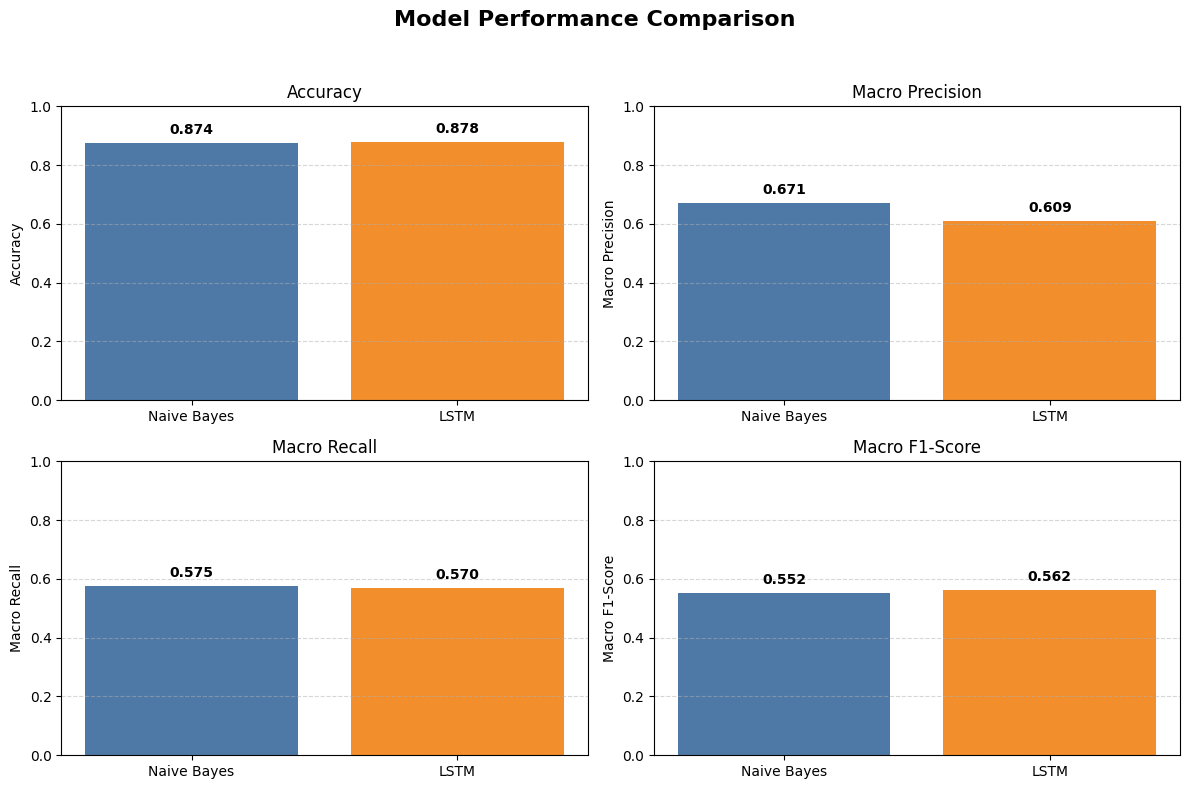

In [6]:
import matplotlib.pyplot as plt

# ✅ Metrics
metrics = {
    "Accuracy": [
        acc_nb,
        acc_lstm
    ],
    "Macro Precision": [
        report_nb["macro avg"]["precision"],
        report_lstm["macro avg"]["precision"]
    ],
    "Macro Recall": [
        report_nb["macro avg"]["recall"],
        report_lstm["macro avg"]["recall"]
    ],
    "Macro F1‑Score": [
        report_nb["macro avg"]["f1-score"],
        report_lstm["macro avg"]["f1-score"]
    ]
}

models = ["Naive Bayes", "LSTM"]
colors = ["#4e79a7", "#f28e2c"]

# ✅ Create 2x2 grid layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Model Performance Comparison", fontsize=16, fontweight='bold')

# ✅ Loop through each metric and subplot index
for idx, (metric, values) in enumerate(metrics.items()):
    row = idx // 2
    col = idx % 2
    ax = axs[row][col]

    bars = ax.bar(models, values, color=colors)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.3f}",
                ha="center", va="bottom", fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for title
plt.show()

## 💾 **Save Trained Model & Tools**
This step saves the trained LSTM model, tokenizer, and label encoder to Google Drive for future use.

In [10]:
# ✅ Save LSTM model
model.save('/content/drive/MyDrive/Project2/sentiment_lstm_model.h5')

# ✅ Save tokenizer
import pickle
with open('/content/drive/MyDrive/Project2/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# ✅ Save label encoder
with open('/content/drive/MyDrive/Project2/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("✅ Model, tokenizer, and label encoder saved to Google Drive.")


✅ Model, tokenizer, and label encoder saved to Google Drive.
